# Title: Home Assignment - Olfactory Brain Imaging



Course code: M_PROPSY
Course coordinator: Matthias Nau
Teaching assistant: Anna van Harmelen
Student: Rasmus Berggren
Date: 18/11/2024
Data source: https://neurosynth.org/analyses/terms/olfactory/

# Loading the Files

The files were loaded using the **nilearn library**. To identify the file paths, the **glob module** was used to locate the files. The glob module works by matching specific patterns—in this case, the file names. When a match is found, the corresponding file is imported into the environment through nilearn.

In [ ]:

import glob # to list files in a directory
from nilearn.image import load_img # to load images

# Load the anatomical and functional images
anatomical_img = load_img(glob.glob("*anatomical.nii"))
functional_img = load_img(glob.glob("*olfactory_uniformity-test_z_FDR_0.01.nii"))


# Plotting the Functional Data on the Anatomical scan

This functions uses the previously imported data and plots the **functional_img** ontop of the **anatomical_img** using plotting from nilearn. The function includes multiple arguments.

* **bg_img**: specifies the background anatomical image to be used
* **display_mode**: specifies the orientation of the plot
* **threshold**: applies a threshold to the data, here values below 0.1 are excluded
* **cmap**:sets the colormap to be used 
* **cut_coords**: specifies the coordinates from the center in mm to cut the brain image at for visualization

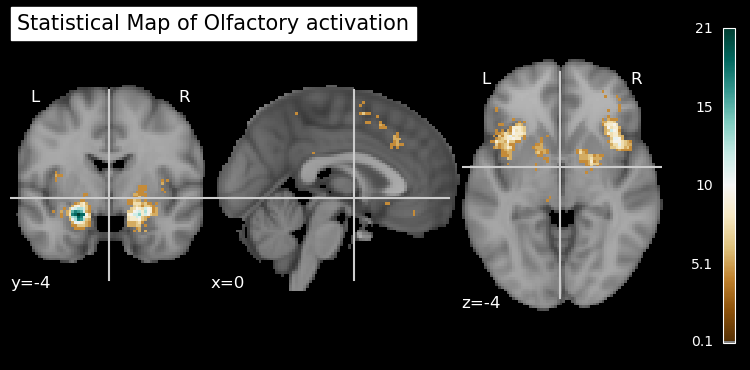

In [ ]:

from nilearn import plotting  # Import nilearn's plotting module for visualizing brain images


# Plot the statistical map overlaid on the anatomical image
plotting.plot_stat_map(functional_img, bg_img=anatomical_img,
                       title="Statistical Map of Olfactory activation",
                       display_mode='ortho', threshold=0.1, cmap="BrBG", cut_coords=(0, -4, -4))

# Show the plot
plotting.show() 


This Python script visualizes the distribution of positive activation values from the statistical map as a histogram using **matplotlib**. The bars of the histogram are colored based on their activation value, using a color gradient to enhance the visualization. This was done using **numpy** for array manipulation and the color module from matplotlib for the color gradient. 

* **get_fdata**: The functional image data is loaded and converted into a 3D NumPy Array
* **bins**: Intervals that divide the range of values into segments. Each bin counts how many data points fall into its interval. The higher bins the more precis, and the lower bins, the more general view of the data.
* **flatten**: Unrolling the data, from a 3D array to a 1D array, meaning it is stored in a single sequence rather multiple levels. 
* **color**: Specifies the color of the bars on the Histogram
* **edgecolor**: Specifies the color of the bar edge



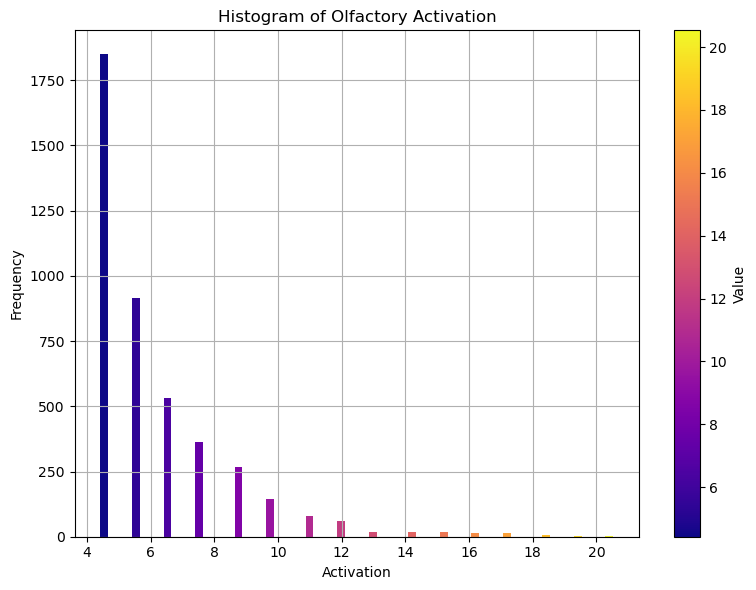

In [ ]:
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import numpy as np  # Import numpy for array manipulation
from matplotlib import cm  # Import colormap module for creating color gradients

# Load the functional image data
data = functional_img.get_fdata()  # Get the data from the image (returns a NumPy array)

# Filter out non-positive values (we are only interested in positive activation values)
positive_data = data[data > 0]

# Calculate the number of bins for the histogram
bins = int(np.sqrt(len(positive_data)))  

# Flatten the array for histogram plotting (convert the 3D data into a 1D array)
flattened_data = positive_data.flatten()

# Create a histogram of the positive values
counts, bins = np.histogram(flattened_data, bins = bins)  # Get the histogram values and bin edges

# Create a color gradient for the histogram bars based on their bin values
norm = plt.Normalize(vmin=min(bins), vmax=max(bins))  # Normalize bins to a [0, 1] scale
colors = cm.plasma(norm(bins[:-1]))  # Get a color for each bin based on the normalized value

# Create the histogram plot
fig, ax = plt.subplots(figsize=(8, 6))  # Set the figure size
for i in range(len(counts)):  # Loop over each bin to plot the bars
    ax.bar(bins[i], counts[i], width=bins[i+1] - bins[i], color=colors[i], align='edge')

# Set the title and axis labels for the plot
ax.set_title('Histogram of Olfactory Activation') 
ax.set_xlabel('Activation') 
ax.set_ylabel('Frequency')  

# Add an empty color bar to indicate the value-to-color mapping
sm = plt.cm.ScalarMappable(cmap='plasma', norm=norm)  
sm.set_array([]) 
cbar = plt.colorbar(sm, ax=ax) 
cbar.set_label('Value')  

# Display grid lines 
plt.grid(True)

# Show the plot
plt.show()
